In [66]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [67]:
#loading data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white_wine <- read_csv2(file = url, col_names = TRUE)
white_wine

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `fixed acidity` = col_number(),
  `volatile acidity` = col_character(),
  `citric acid` = col_character(),
  `residual sugar` = col_character(),
  chlorides = col_character(),
  `free sulfur dioxide` = col_number(),
  `total sulfur dioxide` = col_number(),
  density = col_character(),
  pH = col_number(),
  sulphates = col_character(),
  alcohol = col_number(),
  quality = col_double()
)



fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6
55,0.29,0.3,1.1,0.022,20,110,0.98869,334,0.38,128,7
6,0.21,0.38,0.8,0.02,22,98,0.98941,326,0.32,118,6


Selecting our parameters

We could start by creating a scatterplot of each variable against the quality/classification metric we've created and see which variables have the strongest relationship as an indicator of what parameters will be most important for our model.

A more precise approach would be using feature selection, which will rank the most relevant variables to prediting quality

In [69]:
## Data Cleaning ##
colnames(white_wine) <- make.names(colnames(white_wine))

white_wine$chlorides <- as.numeric(as.character(white_wine$chlorides))
white_wine$volatile.acidity <- as.numeric(as.character(white_wine$volatile.acidity))
white_wine$citric.acid <- as.numeric(as.character(white_wine$citric.acid))
white_wine$residual.sugar <- as.numeric(as.character(white_wine$residual.sugar))
white_wine$density <- as.numeric(as.character(white_wine$density))
white_wine$sulphates <- as.numeric(as.character(white_wine$sulphates))

# # Extracting the columns we want
# redwine <- red_wine %>%
# select(..., ..., ..., quality)

# whitewine <- white_wine %>%
# select(..., ..., ..., quality)

# Finding the mean quality of white wine
avg_quality <- mean(white_wine$quality)
avg_quality

# # Making the quality binary
white_wine_binary <- white_wine %>%
    mutate(binary_quality = if_else(quality < avg_quality, 0, 1))

white_wine_binary

[1] 5.877909

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,binary_quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,0.27,0.36,20.7,0.045,45,170,1.0010,3,0.45,88,6,1
63,0.30,0.34,1.6,0.049,14,132,0.9940,33,0.49,95,6,1
81,0.28,0.40,6.9,0.050,30,97,0.9951,326,0.44,101,6,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6,1
55,0.29,0.30,1.1,0.022,20,110,0.98869,334,0.38,128,7,1
6,0.21,0.38,0.8,0.020,22,98,0.98941,326,0.32,118,6,1


In [81]:
# Measuring sizes
options(repr.matrix.max.rows=10)
summarized_wine <- group_by(white_wine_binary, quality) %>%
    summarize(n=n())

summarized_wine_binary <- group_by(white_wine_binary, binary_quality) %>%
    summarize(n=n())

summarized_wine
summarized_wine_binary 
# 1640 of below average (0)
# 3258 of above average (1)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



quality,n
<dbl>,<int>
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


binary_quality,n
<dbl>,<int>
0,1640
1,3258


In [ ]:
# Sampling equal sizes


In [37]:
# splitting data into training and testing
# whitewine_split <- initial_split(white_wine_binary, prop = 0.74, strata = quality)
# whitewine_train <- training(whitewine_split)
# whitewine_test <- testing(whitewine_split)

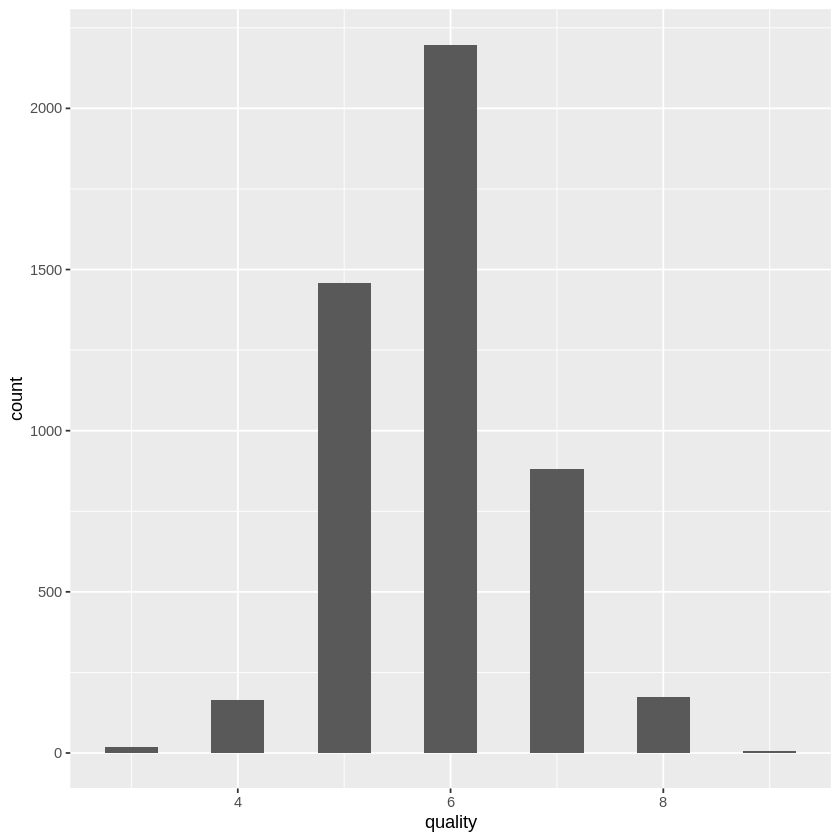

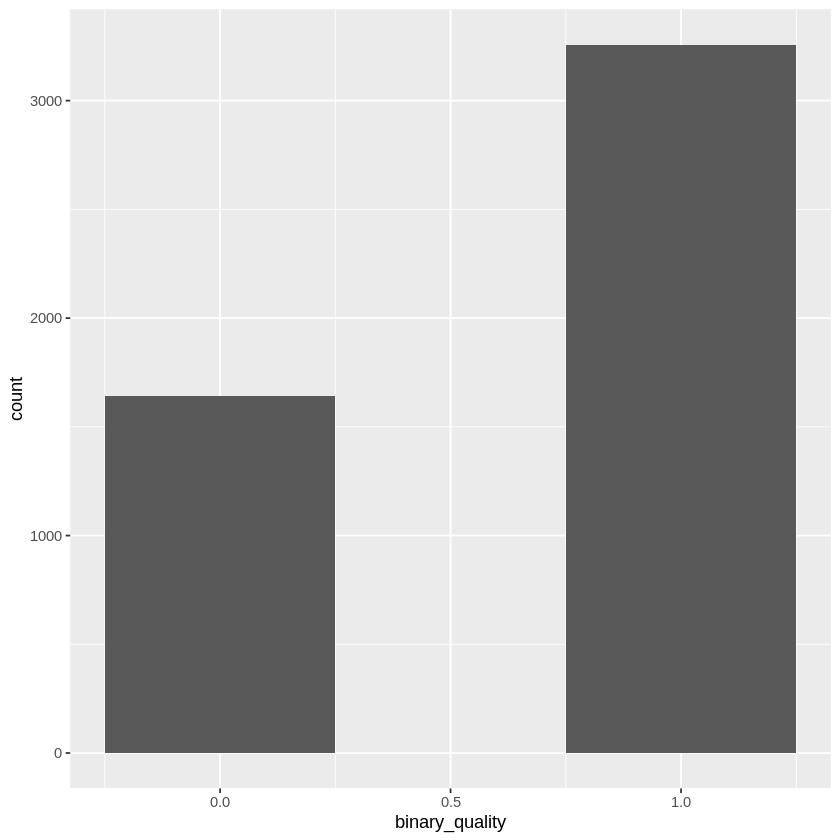

In [38]:
# Visualizing binary quality distributions
white_wine_plot <- ggplot(white_wine, aes(x=quality)) + geom_histogram(binwidth=0.5)
white_wine_plot

white_wine_plot_binary <- ggplot(white_wine_binary, aes(x=binary_quality)) + geom_histogram(binwidth=0.5)
white_wine_plot_binary

In [31]:
## Creating summmary tables and visualizations
# summary(redwine_train)
# redwine_train_summary <- do.call(cbind, lapply(redwine_train, summary))

# summary(whitewine_train)
# whitewine_train_summary <- do.call(cbind, lapply(whitewine_train, summary))

# ...plot <- ggplot(redewine_train, aes(x = binary_quality, y = ...)) + 
#                          geom_bar(stat = "identity") +
#                              xlab("Quality") +
#                              ylab("...")

# ...plot <- ggplot(whitewine_train, aes(x = binary_quality, y = ...)) + 
#                          geom_bar(stat = "identity") +
#                              xlab("Quality") +
#                              ylab("...")